In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

In [2]:
import os




In [3]:

os.chdir(os.path.dirname('/home/hackerman/GitHub/exploration/tf_fun/'))

# propriatary mnist management
DATASETSLIB_HOME = './datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')

/home/hackerman/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import pandas as pd
import numpy as np
filename = os.path.join(datasetslib.datasets_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype(np.float32)

scaler = pp.MinMaxScaler(feature_range=(0,1))
normalized_dataset = scaler.fit_transform(dataset)

train,test=dsu.train_test_split(normalized_dataset,train_size=0.67)

n_x=1
n_y=1
X_train, Y_train, X_test, Y_test = dsu.mvts_to_xy(train,test,n_x=n_x,n_y=n_y)

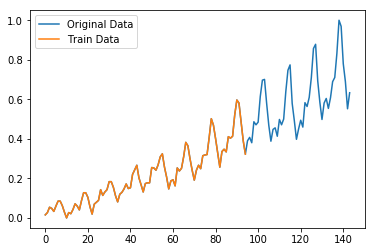

In [5]:
plt.plot(normalized_dataset,label='Original Data')
plt.plot(X_train,label='Train Data')
plt.legend()
plt.show()

In [6]:
state_size = 32
n_epochs = 2000
n_timesteps = n_x
learning_rate = 0.1
n_x_vars = 1
n_y_vars = 1

In [7]:
import tensorflow as tf

In [8]:
tf.reset_default_graph()

In [9]:
X_p = tf.placeholder(tf.float32,[None,n_timesteps,n_x_vars],name='X_p')
Y_p = tf.placeholder(tf.float32,[None,n_timesteps,n_y_vars],name='Y_p')

In [10]:
rnn_inputs = tf.unstack(X_p,axis=1)

In [11]:
os.chdir(os.path.dirname('/home/hackerman/GitHub/NAS_CEPTION/'))


In [12]:

#from cell import BasicLSTMCell

In [13]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import nn_ops


In [14]:
# comparison cell
# from tensorflow.contrib.rnn import BasicLSTMCell
# cell = BasicLSTMCell(state_size)
# my cell
# from cell import BasicNeatCell
# cell = BasicNeatCell(state_size)
# my cell
from cell import BasicNeat2Cell
cell = BasicNeat2Cell(state_size)

In [15]:
rnn_outputs, final_state = tf.nn.static_rnn(cell,rnn_inputs,dtype=tf.float32)

In [16]:
W = tf.get_variable('W',[state_size,n_y_vars])
b = tf.get_variable('b',[n_y_vars], initializer=tf.constant_initializer(0.0))
predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]

In [17]:
y_as_list = tf.unstack(Y_p,num=n_timesteps,axis=1)

In [18]:
mse = tf.losses.mean_squared_error
losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]

In [19]:
total_loss = tf.reduce_mean(losses)

In [20]:
n_timesteps

1

In [21]:
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)


In [22]:
n_epochs

2000

In [35]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    epoch_loss = 0.0
    for epoch in range(n_epochs):
        feed_dict={X_p: X_train.reshape(-1, n_timesteps, 
                                        n_x_vars), 
                   Y_p: Y_train.reshape(-1, n_timesteps, 
                                        n_x_vars)
                  }
        
        epoch_loss,y_train_pred,_=tfs.run([total_loss,predictions,optimizer], 
                                            feed_dict=feed_dict
                                           )
    print("train mse = {}".format(epoch_loss))
    feed_dict={X_p: X_test.reshape(-1, n_timesteps, 
                                    n_x_vars), 
               Y_p: Y_test.reshape(-1, n_timesteps, 
                                    n_y_vars)
              }
    test_loss, y_test_pred = tfs.run([total_loss,predictions], 
                                     feed_dict=feed_dict
                                    )
    print('test mse = {}'.format(test_loss))
    print('test rmse = {}'.format(np.sqrt(test_loss)))

train mse = 0.001958586508408189
test mse = 0.00875528808683157
test rmse = 0.09356969594955444


In [36]:
y_train_pred=y_train_pred[0]
y_test_pred=y_test_pred[0]

In [37]:
#invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

#invert originals
y_train_orig = scaler.inverse_transform(Y_train)
y_test_orig = scaler.inverse_transform(Y_test)

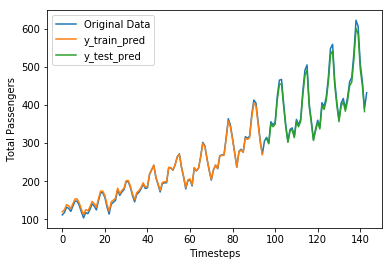

In [38]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_x-1:len(y_train_pred)+n_x-1, :] = y_train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+(n_x*2)-1:len(dataset)-1, :] = y_test_pred
# plot baseline and predictions
plt.plot(dataset,label='Original Data')
plt.plot(trainPredictPlot,label='y_train_pred')
plt.plot(testPredictPlot,label='y_test_pred')
plt.legend()
plt.xlabel('Timesteps')
plt.ylabel('Total Passengers')
plt.show()

In [27]:
x = np.array([[1,2],[3,4],[5,6],[7,8],[9,0],[10,11]])

In [28]:
x.shape

(6, 2)

In [29]:
y= np.split(x,[1,2],axis=0)

In [30]:
y

[array([[1, 2]]), array([[3, 4]]), array([[ 5,  6],
        [ 7,  8],
        [ 9,  0],
        [10, 11]])]

In [31]:
math_ops.ide

AttributeError: module 'tensorflow.python.ops.math_ops' has no attribute 'ide'